In [1]:
# Впишите библиотеки
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

### Задание 1
**задание - 1 балл**</br>
загрузить данные, индекс переменная вида дата/время

In [2]:
df = pd.read_csv(r'C:\Users\polin\OneDrive\Рабочий стол\crime.csv', sep = ",")  
df.rename(columns={'Unnamed: 0': 'date_time'}, inplace=True)
df['date_time'] = pd.to_datetime(df['date_time'])
df.set_index('date_time', inplace = True)
df

,id,state,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id
date_time,,,,,,,,,,,,,,,,,,,,,
2010-07-01 00:10:00,VT-2010-00001,VT,East Montpelier,Washington County,50023.0,COUNTY RD,MIDDLESEX VSP,M,22.0,22.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Citation,False,-1.562157e+09
2010-07-01 00:11:00,VT-2010-00004,VT,Whiting,Addison County,50001.0,N MAIN ST,NEW HAVEN VSP,F,18.0,18.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Arrest for Violation,True,-3.126844e+08
2010-07-01 00:35:00,VT-2010-00005,VT,Hardwick,Caledonia County,50005.0,i91 nb mm 62,ROYALTON VSP,M,18.0,18.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,9.225661e+08
2010-07-01 00:44:00,VT-2010-00006,VT,Hardwick,Caledonia County,50005.0,64000 I 91 N; MM64 I 91 N,ROYALTON VSP,F,20.0,20.0,...,White,Vehicle Equipment,Equipment,False,No Search Conducted,NaN,False,Written Warning,False,-6.032327e+08
2010-07-01 01:10:00,VT-2010-00009,VT,Rochester,Windsor County,50027.0,36000 I 91 S; MM36 I 91 S,ROCKINGHAM VSP,M,24.0,24.0,...,Black,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,2.939526e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 23:09:00,VT-2015-45658,VT,Hartford,Windsor County,50027.0,I 91 S MM69,ROYALTON VSP,M,74.0,74.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,-7.206477e+07
2015-12-31 23:40:00,VT-2015-45659,VT,Hartland,Windsor County,50027.0,I 91 S MM66,ROYALTON VSP,F,29.0,29.0,...,White,Moving Violation,Moving violation,True,Consent Search-Probable Cause,Consent Search - Probable Cause,True,Arrest for Violation,True,-7.206477e+07
2015-12-31 23:44:00,VT-2015-45660,VT,Brattleboro,Windham County,50025.0,MAIN ST & HIGH ST,BRATTLEBORO VSP,F,24.0,24.0,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,5.621929e+08


### Задание 2
**задание - 1 балл**</br>
построить сводную таблицу по клоличеству правонарушений (строки - расса `driver_race`, колонки - пол `driver_gender`) 

In [3]:
pd.pivot_table(df,
               values=['violation'], # Столбец для подсчета
               index=['driver_race'], # Строки
               columns=['driver_gender'], # Колонки
               aggfunc=['count'] # Функция агрегации (подсчет)
              )

count        
              violation        
driver_gender         F       M
driver_race                    
Asian              1022    2424
Black              1339    4232
Hispanic            579    1983
Other                75     188
White             96096  165243

### Задание 3
**задание - 1 балл**</br>
построить сводную таблицу по долям правонарушений в зависимости от рассы `driver_race`(1 - для каждой рассы) и пола внутри рассы `driver_gender` (например, белые мужчины 0.8, белые женщины 0.2), в таблице строки - расса,  колонки - пол. Внимание! сумма по строке должна быть равна 1. 

In [4]:
pivot_table_2 = df.groupby(['driver_race', 'driver_gender']).size().unstack().apply(lambda x: x / x.sum(), axis=1)
pivot_table_2

driver_gender,F,M
driver_race,,
Asian,0.296576,0.703424
Black,0.240352,0.759648
Hispanic,0.225995,0.774005
Other,0.285171,0.714829
White,0.367706,0.632294


### Задание 4
**задание - 1 балл**</br>
найти ежемесячное среднее количество преступлений. Результат в виде Series: индексы дата/время.

In [5]:
monthly_mean = df.resample('M')['violation'].count()
monthly_mean

date_time
2010-07-31    4281
2010-08-31    3429
2010-09-30    3751
2010-10-31    3644
2010-11-30    4430
              ... 
2015-08-31    3521
2015-09-30    3260
2015-10-31    3192
2015-11-30    3019
2015-12-31    2096
Freq: M, Name: violation, Length: 66, dtype: int64

### Задание 5
**задание - 1 балл**</br>
найти ежедневное количество водителей с опьянением `DUI` (см. столбец: `violation` ) и на этой основе построить столбцовую диаграмму агрегировав среднее количество водителей с опьянением по дням недели. Дни недели подписать русскими сокращенными названиями.

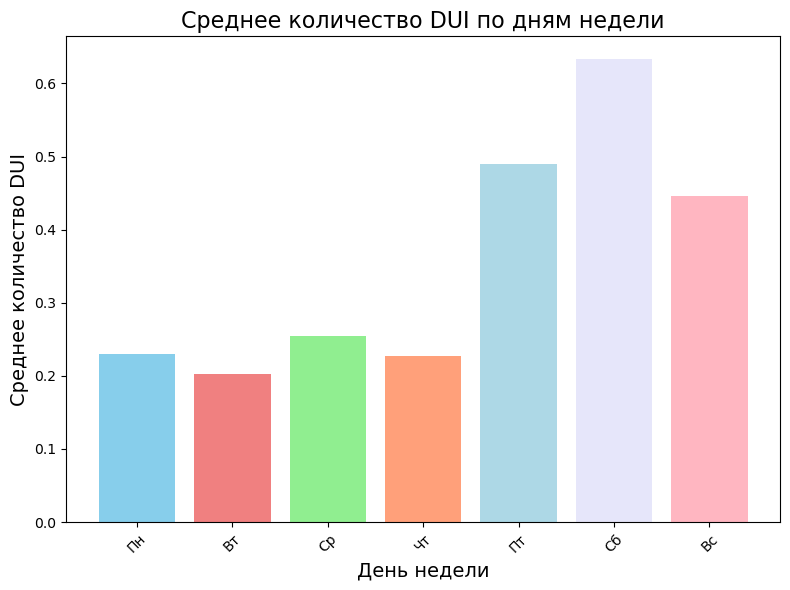

In [6]:
daily_dui = df[df['violation'] == 'DUI'].resample('D')['driver_gender'].count()
# Среднее кол-во DUI по дням недели
weekly_dui_mean = daily_dui.groupby(daily_dui.index.weekday).mean()
days_week = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
# Визуализация
plt.figure(figsize = (8, 6)) 
plt.bar(days_week, weekly_dui_mean, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue', 'lavender', 'lightpink'])  # Измените цвета
plt.xlabel('День недели', fontsize = 14) 
plt.ylabel('Среднее количество DUI', fontsize = 14) 
plt.title('Среднее количество DUI по дням недели', fontsize = 16) 
plt.xticks(rotation = 45)  
plt.tight_layout()
plt.show()

### Задание 6
**задание - 2 балла**</br>
Самостоятельно написать код который опровергает или подтверждает внутригодовую цикличность нарушений по оборудованию автомобиля `Equipment` (см. столбец: `violation` ) для всего диапазона данных.

In [7]:
equipment_violations = df[df['violation'] == 'Equipment']
# Группировка по месяцам и кол-во нарушений
monthly_equipment = equipment_violations.resample('M')['violation'].count()

Делим на первую и вторую половину года. 
Перед проведением статистического теста необходимо определиться, равны ли дисперсии этих групп. Если отношение дисперсии большей выборки к дисперсии меньшей выборки меньше 4, то можно предположить, что дисперсии групп равны.

In [8]:
first_half = monthly_equipment[monthly_equipment.index.month <= 6]
second_half = monthly_equipment[monthly_equipment.index.month > 6]
print(np.var(first_half), np.var(second_half))

39393.0 30990.04320987654


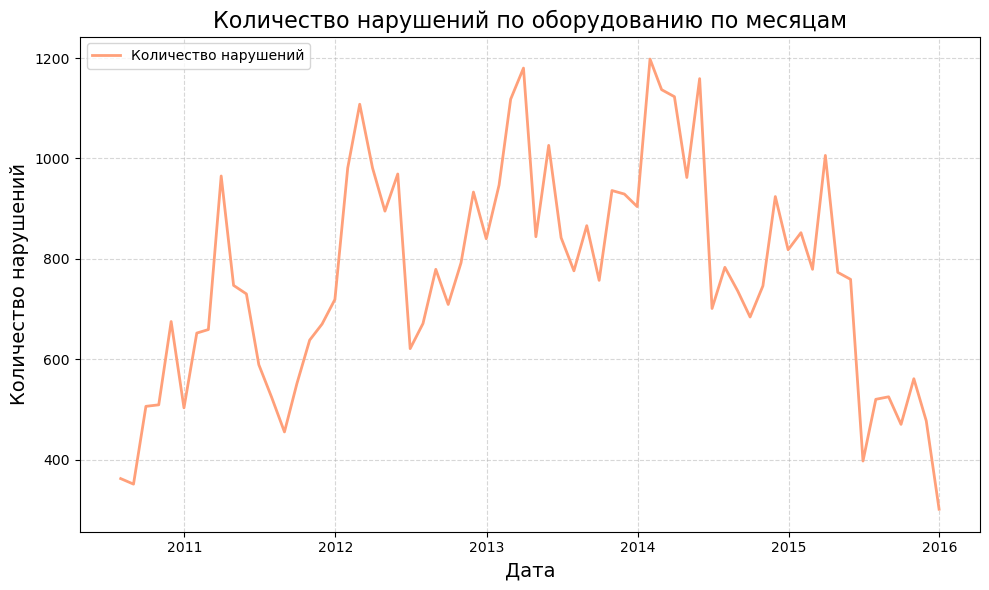

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_equipment.index, monthly_equipment.values, label='Количество нарушений', color='lightsalmon', linewidth=2)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Количество нарушений', fontsize=14)
plt.title('Количество нарушений по оборудованию по месяцам', fontsize=16)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5) 
plt.tight_layout()
plt.show()

Если p-значение меньше 0.05, то мы отвергаем нулевую гипотезу о равенстве средних значений. Это означает, что мы нашли статистически значимые различия между двумя группами.
Если p-значение больше 0.05, то мы не отвергаем нулевую гипотезу, то есть нет статистически значимых различий между группами.
Сайт, с которого брала инфу: https://pythonpip.ru/osnovy/t-test-na-python

In [10]:
t_stat, p_value = ttest_ind(first_half, second_half)
print(f"Статистика t: {t_stat:.2f}")
print(f"P-значение: {p_value:.3f}")

if p_value < 0.05:
    print("Существуют статистически значимые различия в количестве нарушений по оборудованию в первой и второй половине года.")
else:
    print("Нет статистически значимых различий в количестве нарушений по оборудованию в первой и второй половине года.")

Статистика t: 4.83
P-значение: 0.000
Существуют статистически значимые различия в количестве нарушений по оборудованию в первой и второй половине года.


### Задание 7
**задание - 2 балла**</br>
Найдите "самый пьяный час", когда по пятницам-воскресеньям задерживают в среднем максимальное число водителей с опьянением `DUI` (см. столбец: `violation`). Напишите код, сопроводите его визуализацией и выведите самый пьяный час и среднее количество задержанных.

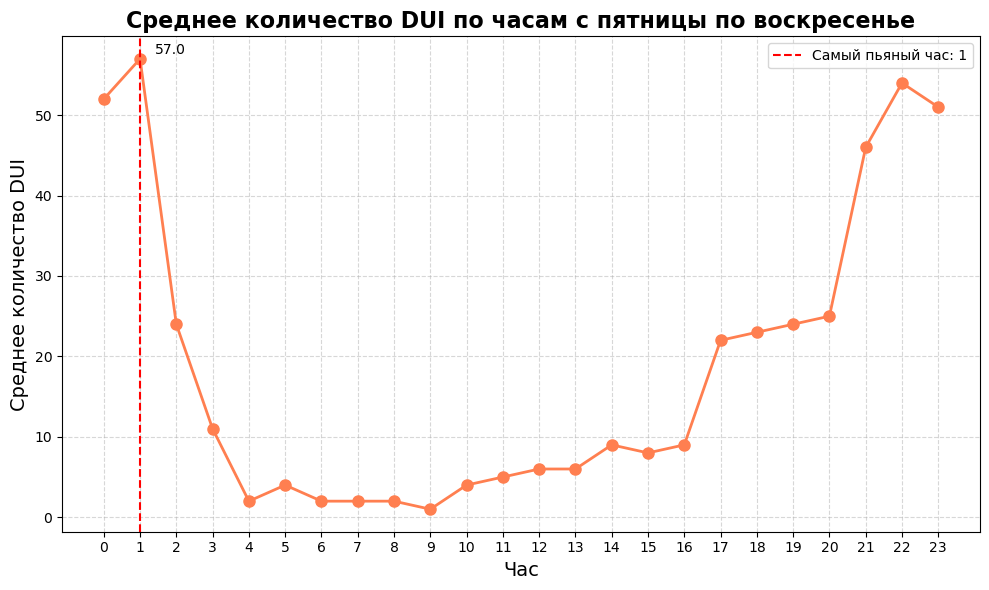

Самый пьяный час: 1, среднее количество задержанных: 57.0


In [11]:
dui_friday_sunday = df[(df['violation'] == 'DUI') & ((df.index.weekday == 4) | (df.index.weekday == 5) | (df.index.weekday == 6))]

# Группировка по часам и счёт кол-ва DUI
hourly_dui_count = dui_friday_sunday.groupby(dui_friday_sunday.index.hour)['violation'].count()

# Вычисление среднего кол-ва DUI для каждого часа
hourly_dui_mean = hourly_dui_count.groupby(hourly_dui_count.index).mean()

# Нахождение самого пьяного часа
drunkest_hour = hourly_dui_mean.idxmax()
drunkest_hour_mean = hourly_dui_mean.max()

# Визуализация
plt.figure(figsize=(10, 6)) 
plt.plot(hourly_dui_mean.index, hourly_dui_mean.values, color='coral', linewidth=2, marker='o', markersize=8)  # Изменяем цвет, толщину линии, добавляем маркеры
plt.xlabel('Час', fontsize=14)
plt.ylabel('Среднее количество DUI', fontsize=14)
plt.axvline(x=drunkest_hour, color='red', linestyle='--', label=f'Самый пьяный час: {drunkest_hour}')
plt.annotate(f'{drunkest_hour_mean:.1f}', xy=(drunkest_hour, drunkest_hour_mean), xytext=(drunkest_hour + 0.4, drunkest_hour_mean + 0.6))
plt.legend()
plt.title('Среднее количество DUI по часам с пятницы по воскресенье', fontsize=16, fontweight='bold')  # Изменяем заголовок
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.5)  
plt.tight_layout()
plt.show()

print(f"Самый пьяный час: {drunkest_hour}, среднее количество задержанных: {drunkest_hour_mean}")

### Задание 8
**задание - 1 балла**</br>
Существует ли округа со значительным количеством правонарушениями по рассовому признаку? Напишите код, подтвердите или опровергните это утверждение.

Скажу честно, тест сам предложил гпт, я реализовала. 
Инфу по большей части брала тут: https://docs.scipy.org/doc/scipy-1.7.0/reference/reference/generated/scipy.stats.chi2_contingency.html

Статистика хи-квадрат: 1763.54
P-значение: 0.000


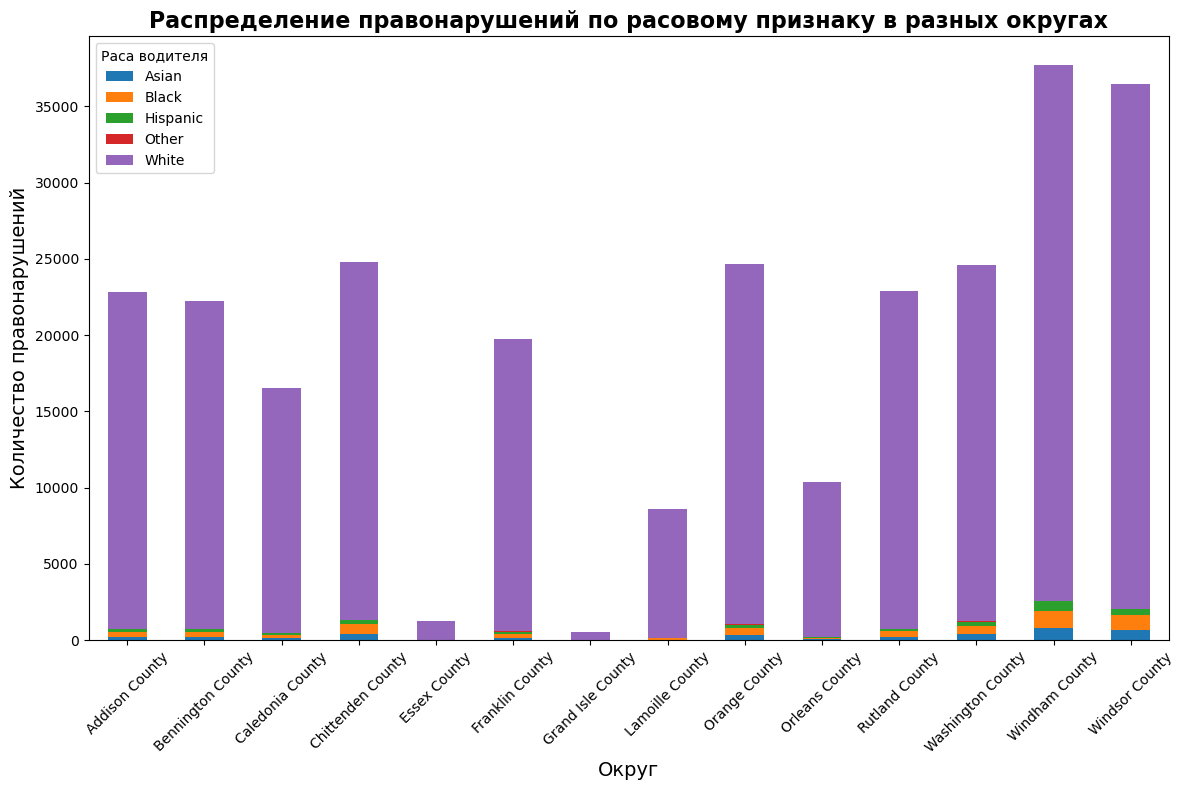

In [12]:
# таблица сопряженности для теста хи-квадрат
contingency_table = pd.crosstab(df['county_name'], df['driver_race'])

# Вычисление критерия хи-квадрат
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Статистика хи-квадрат: {chi2:.2f}")
print(f"P-значение: {p_value:.3f}")
  
contingency_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Округ', fontsize=14)
plt.ylabel('Количество правонарушений', fontsize=14)
plt.title('Распределение правонарушений по расовому признаку в разных округах', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Раса водителя')
plt.tight_layout()
plt.show()

In [13]:
# Проверка на значимость
if p_value < 0.05:
    print("Существуют статистически значимые различия в распределении правонарушений по расовому признаку между округами.")
else:
    print("Нет статистически значимых различий в распределении правонарушений по расовому признаку между округами.")

Существуют статистически значимые различия в распределении правонарушений по расовому признаку между округами.
